# Govbase for data scientists

## What is Govbase?

## Why use Govbase?

## Importing data from Govbase (in notebook only)
- Using [Python wrapper for Airtable API](https://github.com/josephbestjames/airtable.py) to import data
- Need to request access and create account to get API key
- Recommend saving the API key in a (.gitignore-d) text file and importing
- Loading into pandas DataFrame for ease of analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from airtable import airtable

# Set Airtable access parameters
BASE_ID = 'appx3e9Przn9iprkU'
with open('api_key.txt', 'r') as f:
    API_KEY = f.readline().strip()
    
# Set Airtable table-specific parameters
FIELDS = {'Projects': ['Project name', 'Status', 'Online / offline', 'Implements structures', 
                       'Category', 'Subcategory', 'Tags', 'Project ownership type', 'Legally owned by organization', 
                       'Contributed to by organization', 'Funded by organization', 'Instances'],
         'Organizations': ['Organization name', 'Structure (observed)', 'Activities', 'Size', 
                           'Do you need permission to join?', 'To join, you need to...', 'Total effort to join', 
                           'How do members meet?', 'Process to leave', 'Instances',
                           'How open-source is your infrastructure?'],
         'Structures': ['Structure name', 'Belongs to ontology', 'Is subclass of', 'Is component of',
                        'Is property of', 'Tags', 'Is superclass of', 'Is subclass of (all)',
                        'Implemented by project', 'Used by organization in their governance',
                        'Adopted by organization']}

In [3]:
at = airtable.Airtable(BASE_ID, API_KEY)

In [4]:
def get_table_as_df(tableName):
    '''Get all records in a table and load into DataFrame'''
    records = []
    for r in at.iterate(tableName, fields=FIELDS[tableName]):
        records.append({'id': r['id'], **(r['fields'])})
    df = pd.DataFrame(records)
    df.set_index('id', inplace=True)
    return df

In [5]:
# Load tables into DataFrames
df_projects = get_table_as_df('Projects')
df_orgs = get_table_as_df('Organizations')
df_structs = get_table_as_df('Structures')

In [6]:
print(len(df_projects.index))
print(len(df_orgs.index))
print(len(df_structs.index))

496
443
411


In [7]:
df_projects.head()

,Project name,Category,Legally owned by organization,Online / offline,Contributed to by organization,Status,Project ownership type,Subcategory,Implements structures,Tags,Instances,Funded by organization
id,,,,,,,,,,,,
rec0Ddf5WWSVr8qRC,Futarchy,product,[recD7IYQqmaGm3PW1],Online communities,[recD7IYQqmaGm3PW1],Inactive,Open-source,[software library],NaN,NaN,NaN,NaN
rec0QC4Cmj2iIhWJC,Simple Machines Forum,product,NaN,Online communities,NaN,Active,Open-source,[application/tool],[recz34NUJWuz5yYI4],NaN,NaN,NaN
rec0TtUnv3rJqorXf,Jupyter,product,[reccOsNXSYFXhYqpK],Not community-related,[recRQ3M1BTucR3kS9],Active,Open-source,[software framework],NaN,NaN,NaN,NaN
rec0U16mgXwzoXzBf,Yearn,product,NaN,Not community-related,NaN,Active,NaN,[application/tool],NaN,"[blockchain ecosystem, DeFi]",NaN,NaN
rec0XapkrY8v3FJ5Z,Airesis,platform,NaN,Online communities,NaN,Active,NaN,[social network],NaN,NaN,NaN,NaN


How full are these columns? (What % of values aren't missing?)

In [8]:
def pct_full(df):
    count = df.count()
    pct = count/count[0]*100
    print("count\tpct\tcolumn")
    for col, val in pct.iteritems():
        print(f"{count[col]}\t({pct[col]:.1f}%)\tfor {col}")

In [9]:
pct_full(df_projects)
print("\n")
pct_full(df_orgs)

count	pct	column
496	(100.0%)	for Project name
477	(96.2%)	for Category
101	(20.4%)	for Legally owned by organization
485	(97.8%)	for Online / offline
51	(10.3%)	for Contributed to by organization
487	(98.2%)	for Status
236	(47.6%)	for Project ownership type
351	(70.8%)	for Subcategory
185	(37.3%)	for Implements structures
230	(46.4%)	for Tags
69	(13.9%)	for Instances
40	(8.1%)	for Funded by organization


count	pct	column
443	(100.0%)	for Organization name
416	(93.9%)	for Structure (observed)
45	(10.2%)	for Do you need permission to join?
10	(2.3%)	for Size
123	(27.8%)	for Instances
131	(29.6%)	for How open-source is your infrastructure?
90	(20.3%)	for Total effort to join
117	(26.4%)	for Activities
39	(8.8%)	for To join, you need to...
34	(7.7%)	for Process to leave
29	(6.5%)	for How do members meet?


## What is currently in Govbase?

### **Viz**: distribution of represented project categories, structures, project ownership types

#### Overall

In [10]:
# Overall breakdown for projects
print(df_projects['Category'].value_counts(), '\n')
print(df_projects['Status'].value_counts(), '\n')
print(df_projects['Project ownership type'].value_counts(), '\n')

product            254
platform           164
research            21
standard            21
policy template     15
mashup               2
Name: Category, dtype: int64 

Active              388
Inactive             45
Work in progress     40
Dead                 14
Name: Status, dtype: int64 

Open-source        183
Privately-owned     41
Public domain        7
Open-core            5
Name: Project ownership type, dtype: int64 



#### web3-related projects

In [11]:
# Breakdown for web3-related projects
web3Tags = ['blockchain ecosystem', 'DAO ecosystem', 'DeFi']
df_tmp = df_projects.loc[pd.notnull(df_projects['Tags'])]
df_projects_web3 = df_tmp.loc[df_tmp['Tags'].apply(lambda tags: any(x in tags for x in web3Tags))]

For web3-specific projects:


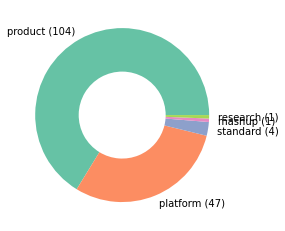

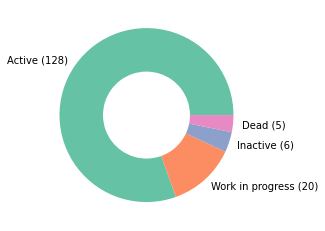

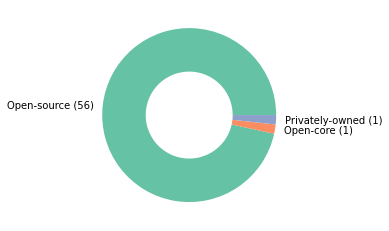

In [12]:
for col in ['Category', 'Status', 'Project ownership type']:
    vals = df_projects_web3[col].value_counts()
    plt.figure()
    labels = [f"{k} ({v})" for k, v in vals.items()]
    fig = plt.pie(vals, labels=labels, colors=sns.color_palette("Set2"), wedgeprops=dict(width=0.5))

### **Viz**: distribution of represented organization structures, activities

#### Overall

In [13]:
# Overall breakdown for organizations
print(df_orgs['Structure (observed)'].value_counts(), '\n') # TODO: map to structure names
print(df_orgs['Total effort to join'].value_counts(), '\n')
print(df_orgs['How open-source is your infrastructure?'].value_counts(), '\n') # TODO: split into bins

[recRfWaeaqKyR7Rju]                                          94
[recg2w7VeFpp41Uz9]                                          83
[recYJRCZRxMoyChU4]                                          82
[recB3K3vCbzdXCK35]                                          35
[recF5BMnOa6XIEVbF]                                          14
[recQXnexB5X4Hxjo1]                                          13
[recRuzDsDlxjgHFcV]                                           9
[recDq9wGFhDUulrXp]                                           8
[reckL7dW8MimIf2Aq]                                           8
[rec5hcTwXOE9rKc0X]                                           7
[reccV9jcL5d1kROe1]                                           6
[recXMtTPXmUysBXtH]                                           6
[recqoTeeWdTsPe74k]                                           5
[recoKCjN6AFFBfevS]                                           4
[rec0OqQbaO84qbl6w]                                           4
[rec5IZagKUYtU6pvV]                     

#### Breakdown for web3-related organizations

## What can we learn from Govbase? Some examples.

### **Viz**: Which projects are most frequently used by organizations?

### **Viz**: Which tools are built on most? (dependencies of the most projects)

### **Viz**: Distribution of owner types/funding sources for blockchain ecosystem projects

### **Viz**: Distribution of how open-source organizations are; relationship to e.g., funding source, activity

### **Viz**: Most common combinations of structures observed in DAOs (i.e., what's most likely to be needed to implement a DAO)

### **Viz**: Distribution of DAO joining/leaving methods, total effort to join, how do members meet? Are these related to e.g., DAO size, activities

## Notes on Govbase future plans/maintenance
- Expansion of Documents, Constitutional models, APIs, Entity-Decision model tables?
- Maintenance of more fleshed out tables?
    - Scrape fields where possible?
    - Auto-updating of scrapeable fields every ~1 week?
    - Call upon reader to submit updates where needed?